
Logistic Regression Evaluation
--------------------------------

Accuracy: 0.9333333333333333
Precision: 0.9565217391304348
Recall: 0.8888888888888888
F1 Score: 0.9147727272727273


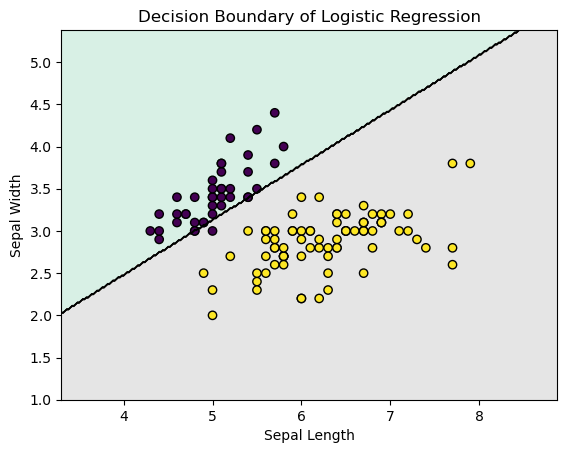

<Figure size 640x480 with 0 Axes>

In [6]:
#Logistic Regression 

''' Importing Library and required function that are required  '''

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Logistic Regression Implementation

class LogisticRegression:
    
    ''' A constructor is defined , that will automatically exectued 
        which contains the value of learning rate and number of iterations 
        that will be made on the dataset as a hyperparameter and variables are also initialized that 
        will be used in other functions '''
    
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None  # Initially given as None , it will be initialized in fit method .
        self.bias = None  # Initially given  as None , it will be initialized in fit method .

    def _sigmoid(self, z): 
            
        ''' Sigmoid is calculated and retured in the method _sigmoid,
        using numpy library that deals with the large multi-dimensional
        arrays , matrices and high level mathematical functions to operate on them '''
        return 1 / (1 + np.exp(-z))
    def fit(self, X, y):
        
        ''' This method deals with fitting of model using Gradient Descent optimization algorithm,
        and initially we have also initialized the weights of all the rows and bias to be zero '''
        

        # Initializing the weights for all rows and bias to be zero .
        no_sample, no_features = X.shape
        self.weights = np.zeros(no_features)
        self.bias = 0

        ''' Implimenting Gradient descent to update weights and bias for which iteratively
        move in the direction of steepest descent and returning instance of a class'''
        
        for temp in range(self.n_iterations):
            linear_log_model = np.dot(X, self.weights) + self.bias
            y_pred = self._sigmoid(linear_log_model)

            d_weight = (1 / no_sample) * np.dot(X.T, (y_pred - y))
            d_bias = (1 / no_sample) * np.sum(y_pred - y)

            self.weights = self.weights - self.learning_rate * d_weight
            self.bias = self.bias - self.learning_rate * d_bias

        return self

    def predict_proba(self, X):
        
        ''' Calculating the prediction probability using numpy library and adding bias
        returning the value to the sigmoid function as a parameter to it '''

        linear_log_model = np.dot(X, self.weights) + self.bias
        return self._sigmoid(linear_log_model)

    def predict(self, X, threshold=0.5):
        ''' This method is used to calculate the probability of the data and we have 
        given 0.5 as the threshold for it. Finally if probability is more then or equal to 0.5 
        then 1 will be assigned else 0 will be assigned '''
        probab = self.predict_proba(X)
        return np.where(probab >= threshold, 1, 0)


''' Loading the Iris data into a vaiable then defining the data and target columns'''
df = load_iris()
X = df.data[:, :2] 
y = (df.target != 0).astype(int)  # Converting it to binary classification 

''' Splitting of dataset into X_train, X_test, y_train, y_test using train_test_split function dedicating
20% of the data for testing and 80% of the data will be used for traning with setting the random_state to 38'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=38)


''' Training the model using Logistic Regression method that was created and fit method for fitting the model 
and passing X_train and y_train to it. Additonally, we are predicting on the test set so that the model 
will be tested for handling new data'''
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

''' Calcualtion of accuracy , precision , recall and F1 Score by comparing the predicted value to the original 
value and printing those values for checking its performance metrics'''
accu = accuracy_score(y_test, lr_pred)
prec = precision_score(y_test, lr_pred, average='macro')
recall = recall_score(y_test, lr_pred, average='macro')
f1 = f1_score(y_test, lr_pred, average='macro')

print("\nLogistic Regression Evaluation")
print("--------------------------------")
print("")
print("Accuracy:", accu)
print("Precision:", prec)
print("Recall:", recall)
print("F1 Score:", f1)

''' For Plotting the decision boundary , we are finding min and max value of the features then adding 
and substracting +1 and -1 for margin . Lately creating mesh grid that will help to generate grid of points 
and using our model to predict the class label for the data points then using scatter function for plotting 
the data points and decision boundry. We will be showing the training data for visualization so that 
the relationship can be understood'''

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
x_grid, y_grid = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = lr_model.predict(np.c_[x_grid.ravel(), y_grid.ravel()])
Z = Z.reshape(x_grid.shape)
plt.contourf(x_grid, y_grid, Z, alpha=0.5, cmap='Pastel2')  # Use a different colormap for decision regions
plt.contour(x_grid, y_grid, Z, colors='k', linewidths=0.5)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', edgecolors='k', marker='o')  # Use 'viridis' colormap for data points
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Decision Boundary of Logistic Regression')
plt.show()
plt.savefig('logistic_regression_decision_boundary_plot.png') 


SVM Evaluation
--------------------------------

Accuracy: 0.7
Precision: 0.3181818181818182
Recall: 0.3333333333333333
F1 Score: 0.32558139534883723


/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


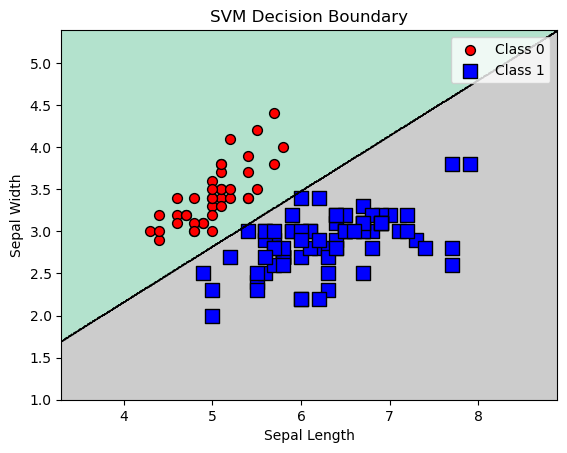

<Figure size 640x480 with 0 Axes>

In [7]:
''' Importing Library and required function that are required  '''

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# SVM Implementation

class SVM:
    
    ''' A constructor is defined , that will automatically exectued 
        which contains the values of learning rate , number of iterations and learning rate
        that will be made on the dataset as a hyperparameter and variables are also initialized that 
        will be used in other methods '''
    
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.weights = None  # Initially given as None , it will be initialized in fit method .
        self.bias = None  # Initially given as None , it will be initialized in fit method .

    def fit(self, X, y):
        ''' This method deals with the fitting, implimenting Support Vector Machine and we have used 
        gradient descent optimization for finding the optimal hyperplane which will be seprating 
        different classes while maxing the margin. we have assigned y_tar for the values if the label has 
        value less then or equal to zero and +1 to the values that are else'''
        
        n_samples, n_features = X.shape

        y_tar = [-1 if label <= 0 else 1 for label in y]

        self.weights = np.zeros(n_features)
        self.bias = 0

        for temp in range(self.n_iters):
            for id_x, x_pos in enumerate(X):
                condition = y_tar[id_x] * (np.dot(x_pos, self.weights) - self.bias) >= 1
                if condition:
                    self.weights = self.weights - self.lr * (2 * self.lambda_param * self.weights)
                else:
                    self.weights = self.weights - self.lr * (2 * self.lambda_param * self.weights - np.dot(x_pos, y_tar[id_x]))
                    self.bias = self.bias - self.lr * y_tar[id_x]

    def predict(self, X):
        ''' This method will compute the linear combination of input function by working on the
        learned parameters weight and bias which returns the predicted class label for the data'''
        
        label = np.dot(X, self.weights) - self.bias
        return np.sign(label)
    
'''Loading the Iris data into a vaiable then defining the data and target columns'''
df = load_iris()
X = df.data[:, :2]
y = (df.target != 0).astype(int)  # Converting it to binary classification
    
    
''' Splitting of dataset into X_train, X_test, y_train, y_test using train_test_split function dedicating
20% of the data for testing and 80% of the data will be used for traning with setting the random_state to 38'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=38)


''' Training the model using SVM method that was created and fit method for fitting the model 
and passing X_train and y_train to it. Additonally, we are predicting on the test set so that the model 
will be tested for handling new data'''
svm_model = SVM()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

''' Calcualtion of accuracy , precision , recall and F1 Score by comparing the predicted value to the original 
value and printing those values for checking its performance metrics'''
svm_acc = accuracy_score(y_test, svm_pred)
svm_prec = precision_score(y_test, svm_pred, average='macro')
svm_recall = recall_score(y_test, svm_pred, average='macro')
svm_f1 = f1_score(y_test, svm_pred, average='macro')


print("SVM Evaluation")
print("--------------------------------")
print("")
print("Accuracy:", svm_acc)
print("Precision:", svm_prec)
print("Recall:", svm_recall)
print("F1 Score:", svm_f1)

''' This function is for Plotting the decision boundary we are passing X_train , y_train and SVM_model, 
we are finding min and max value of the features then adding and substracting +1 and -1 for margin . 
Lately creating mesh grid that will help to generate grid of points and using our model to predict the 
class label for the data points then using scatter function for plotting the data points and decision boundry.'''

def plot_decision_boundary_svm(X, y, model):
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    grid_x1, grid_x2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01), np.arange(x2_min, x2_max, 0.01))
    Z = model.predict(np.array([grid_x1.ravel(), grid_x2.ravel()]).T)
    Z = Z.reshape(grid_x1.shape)
    plt.contourf(grid_x1, grid_x2, Z, alpha=0.3)
    plt.contourf(grid_x1, grid_x2, Z, alpha=1.0, cmap='Pastel2')
    plt.contour(grid_x1, grid_x2, Z, colors='k', linewidths=0.8)
    plt.scatter(X[y == 0, 0], X[y == 0, 1], c='red', label='Class 0', marker='o', s=50, edgecolors='k')
    plt.scatter(X[y == 1, 0], X[y == 1, 1], c='blue', label='Class 1', marker='s', s=100, edgecolors='k')
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.title('SVM Decision Boundary')
    plt.legend()
    plt.show()
plot_decision_boundary_svm(X_train, y_train, svm_model)
plt.savefig('SVM_decision_boundary_plot.png') 

In [3]:
#Decision Tree - ID3

import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def entropy(target_col):
    """
    Calculate the entropy of a dataset.
    """
    elements, counts = np.unique(target_col, return_counts=True)
    entropy_val = -np.sum([(counts[i]/np.sum(counts)) * np.log2(counts[i]/np.sum(counts)) for i in range(len(elements)) if counts[i] != 0])
    return entropy_val  

def InfoGain(data, split_attribute_name, target_name="class"):
    """
    Calculate the information gain of a dataset.
    """
    total_entropy = entropy(data[target_name])
    vals, counts = np.unique(data[split_attribute_name], return_counts=True)
    weighted_entropy = np.sum([(counts[i]/np.sum(counts)) * entropy(data.where(da[split_attribute_name]==vals[i]).dropna()[target_name]) for i in range(len(vals))])
    information_gain = total_entropy - weighted_entropy
    return information_gain  

def load_and_prepare_data():
    """
    Load the Iris dataset, preprocess it, and split it into training and testing sets.
    """
    iris = load_iris()
    X = pd.DataFrame(iris.data, columns=iris.feature_names)
    y = pd.Series(iris.target, name='class')
    return X, y

def ID3(data, originaldata, features, target_attribute_name="class", parent_node_class=None):
    """
    ID3 Algorithm.
    """
    if len(np.unique(data[target_attribute_name])) <= 1:
        return np.unique(data[target_attribute_name])[0]
    elif len(data)==0:
        return np.unique(originaldata[target_attribute_name])[np.argmax(np.unique(originaldata[target_attribute_name],return_counts=True)[1])]
    elif len(features) ==0:
        return parent_node_class
    else:
        parent_node_class = np.unique(data[target_attribute_name])[np.argmax(np.unique(data[target_attribute_name],return_counts=True)[1])]
        item_values = [InfoGain(data, feature, target_attribute_name) for feature in features]
        best_feature_index = np.argmax(item_values)
        best_feature = features[best_feature_index]
        tree = {best_feature:{}}
        features = [i for i in features if i != best_feature]
        for value in np.unique(data[best_feature]):
            value = value
            sub_data = data.where(data[best_feature] == value).dropna()
            subtree = ID3(sub_data,originaldata,features,target_attribute_name,parent_node_class)
            tree[best_feature][value] = subtree
        return tree

def evaluate_model(tree, X_test, y_test):
    """
    Evaluate the metrics of the ID3 model on the test dataset.
    """
    default_class = y_test.mode()[0]  # Choose default class based on mode of y_test
    predictions = [predict(tree, instance, default_class) for _, instance in X_test.iterrows()]
    # Filter out any unknown or unexpected classes in predictions
    predictions = [p if p in np.unique(y_test) else default_class for p in predictions]
    # Filter out any unknown or unexpected classes in y_test
    y_test_filtered = y_test[y_test.isin(np.unique(predictions))]
    
    accuracy = accuracy_score(y_test_filtered, predictions)
    precision = precision_score(y_test_filtered, predictions, average='macro', zero_division=0)
    recall = recall_score(y_test_filtered, predictions, average='macro', zero_division=0)
    f1 = f1_score(y_test_filtered, predictions, average='macro', zero_division=0)
    return accuracy, precision, recall, f1


def predict(tree, instance, default_class):
    """
    Predict the class label for a single instance using the trained ID3 decision tree.
    """
    for attribute, subtree in tree.items():
        value = instance[attribute]
        if value in subtree:
            if isinstance(subtree[value], dict):
                return predict(subtree[value], instance, default_class)
            else:
                return subtree[value]
    # If no valid prediction found, return default class
    return default_class


# Load and prepare the dataset
X, y = load_and_prepare_data()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=38)

# Train the ID3 model
tree = ID3(pd.concat([X_train, y_train], axis=1), X_train, X_train.columns)

# Evaluate the model
accuracy, precision, recall, f1 = evaluate_model(tree, X_test, y_test)

print("Decision Tree ID3 Evaluation")
print("----------------------------")
print("")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Decision Tree ID3 Evaluation
----------------------------

Accuracy: 0.8666666666666667
Precision: 0.9111111111111111
Recall: 0.8518518518518517
F1 Score: 0.8534798534798534


In [4]:
#Decision Tree C4.5

import numpy as np
import pandas as pd
from collections import Counter
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def entropy(target_col):
    """
    Calculate the entropy of a dataset for a given target column.
    """
    unique_counts = np.unique(target_col, return_counts=True)
    # Initialize an empty list to store the entropy values for each element
    entropies = []
    # Iterate over each element in the counts array
    for i in range(len(unique_counts)):
    # Calculate the probability of the current element
        probability = unique_counts[i] / np.sum(unique_counts)
    # Calculate the entropy contribution of the current element      
        epsilon = 1e-15  # Small epsilon value to avoid zero probabilities
        entropy_contri = (-probability) * np.log2(probability+epsilon)    
    # Add the entropy contribution to the list of entropies
        entropies.append(entropy_contri)
    # Sum up all the entropy contributions to get the total entropy
    total_entropy = np.sum(entropies)
    return total_entropy

def info_gain(data, split_attribute_name, target_name="class"):
    """
    Calculate the information gain of splitting the dataset on a specific attribute.
    """
    #Calculates the total entropy of the dataset based on the (target_name)
    total_entropy = entropy(data[target_name])
    #Find the unique values and corresponding counts
    vals, counts = np.unique(data[split_attribute_name], return_counts=True)
    weighted_entropies = []
    # Iterate over each unique value in the split attribute column
    for i in range(len(vals)):
    # Filter the dataset where the split attribute equals the current unique value
        subset = data.where(data[split_attribute_name] == vals[i]).dropna()
    # Calculate the entropy of the subset based on the target column
        subset_entropy = entropy(subset[target_name])
    # Calculate the proportion of samples in the subset relative to the total number of samples
        subset_proportion = counts[i] / np.sum(counts)
    # Multiply the subset entropy by the subset proportion to get the weighted entropy
        weighted_entropy = subset_proportion * subset_entropy
    # Add the weighted entropy to the list of weighted entropies
        weighted_entropies.append(weighted_entropy)
    # Sum up all the weighted entropies to get the total weighted entropy
    total_weighted_entropy = np.sum(weighted_entropies)
    Information_Gain = total_entropy - total_weighted_entropy
    return Information_Gain
'''
def load_and_prepare_data():
    """
    Load the Iris dataset, preprocess it, and split it into training and testing sets.
    """
    iris = load_iris()
    X = pd.DataFrame(iris.data, columns=iris.feature_names)
    y = pd.Series(iris.target, name='class')
    return X, y'''

def gain_ratio(data, split_attribute_name, target_name="class"):
    """
    Calculate the gain ratio for a dataset based on a given attribute, adjusting information gain for split info.
    """
    info_gain_val = info_gain(data, split_attribute_name, target_name)
    vals, counts = np.unique(data[split_attribute_name], return_counts=True)
    #Computes the split information, which is a measure of the amount of information required to classify a given dataset
    split_info = np.sum(
        [
            (-counts[i] / np.sum(counts)) * np.log2(counts[i] / np.sum(counts))
            for i in range(len(vals))
        ]
    )
    if split_info == 0:
        return 0
    gain_ratio_val = info_gain_val / split_info
    return gain_ratio_val

def best_split(data, features, target_name="class"):
    """
    Determine the best feature to split on in the dataset, based on the highest gain ratio.
    """
    #Calculates the gain ratio for each feature in the dataset
    gain_ratio_vals = [gain_ratio(data, feature, target_name) for feature in features]
    #Calculates the index of the attribute with the highest gain ratio
    best_feature_index = np.argmax(gain_ratio_vals)
    best_feature = features[best_feature_index] #Retrieves the name of the best feature (attribute) based on the highest gain ratio value
    return best_feature

def C45(data, features, target_name="class", parent_node_class=None):
    """
    Recursively build the decision tree using the C4.5 algorithm.
    """
    
    if len(np.unique(data[target_name])) <= 1: #Checks if only one unique class is in the dataset and returns that class as the leaf node label
        return np.unique(data[target_name])[0]
    elif len(data) == 0: #Checks if there's no data left to split. If true, it returns the class of the majority of the parent node's class.
        return Counter(parent_node_class).most_common(1)[0][0]
    elif len(features) == 0: #Checks if there are no features left to split on. If true, it returns the majority class of the current data as the leaf node's label
        return parent_node_class
    else:
        parent_node_class = Counter(data[target_name]).most_common(1)[0][0]
        best_feature = best_split(data, features, target_name)
        tree = {best_feature: {}} #Creates a subtree with the best feature as the root node
        features = [i for i in features if i != best_feature] #contains all features excpet for best_feature that was choosen
        #recursively calls the C45 function on the filtered subset of data to build the subtree for that specific value.
        for value in np.unique(data[best_feature]):
            value = value
            sub_data = data.where(data[best_feature] == value).dropna()
            subtree = C45(sub_data, features, target_name, parent_node_class)
            tree[best_feature][value] = subtree
        return tree

# Load and preprocess the Iris dataset
def load_and_prepare_data():
    """
    Load the Iris dataset, preprocess it, and split it into training and testing sets.
    """
    iris = load_iris()
    X = pd.DataFrame(iris.data, columns=iris.feature_names)
    y = pd.Series(iris.target, name='class')
    return X, y

# Train the C4.5 model on the Iris dataset
def train_model(X_train, y_train, features):
    """
    Train the C4.5 decision tree model on the training dataset.
    """
    return C45(pd.concat([X_train, y_train], axis=1), features)

# Predict the class of samples using the trained C4.5 model
def predict(tree, instance, default_prediction=0):
    """
    Predict the class label for a single instance using the trained C4.5 decision tree.
    """
    for key in tree.keys():
        value = instance[key]
        if isinstance(value, (int, float)): 
            # For continuous features, check if the instance value is less than or equal to the splitting threshold
            threshold = float(list(tree[key].keys())[0])
            if value <= threshold:
                branch = '<='
            else:
                branch = '>'
            try:
                tree = tree[key][branch]
            except KeyError:
                # Unknown branch
                return default_prediction
        else:
            try:
                tree = tree[key][value]
            except KeyError:
                # Unknown branch
                return default_prediction
        if type(tree) is not dict:
            return tree
    return default_prediction



# Evaluate the performance of the C4.5 model on the test dataset
def evaluate_model(tree, X_test, y_test):
    """
    Evaluate the metrics of the C4.5 model on the test dataset.
    """
    predictions = [predict(tree, instance) for index, instance in X_test.iterrows()]
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='macro',zero_division=0)
    recall = recall_score(y_test, predictions, average='macro',zero_division=0)
    f1 = f1_score(y_test, predictions, average='macro',zero_division=0)
    return accuracy, precision, recall, f1

# Load and prepare the dataset
X, y = load_and_prepare_data()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=38)

# Define features
features = X_train.columns

# Train the C4.5 model
tree = train_model(X_train, y_train, X_train.columns)

# Predict and evaluate the model
accuracy, precision, recall, f1 = evaluate_model(tree, X_test, y_test)



print("Decision Tree C4.5 Evaluation")
print("----------------------------")
print("")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Decision Tree C4.5 Evaluation
----------------------------

Accuracy: 0.3333333333333333
Precision: 0.1111111111111111
Recall: 0.3333333333333333
F1 Score: 0.16666666666666666


In [8]:
#Decision Tree - ID3

import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def entropy(target_col):
    """
    This function measure the entropy of the data and measuring the disorder and impurity in the 
    target column.
    """
    ele, count = np.unique(target_col, return_counts=True)
    entropy_val = -np.sum([(count[i]/np.sum(count)) * np.log2(count[i]/np.sum(count)) for i in range(len(ele)) if count[i] != 0])
    return entropy_val  

def InfoGain(data, split_attribute_name, target_name="class"):
    """
    This function gives us the info gain which is caluated using the total entropy and weighted entropy and 
    the difference of them will be the info gain. The weighted entropy is calculated by multiplying the subset 
    proportion and the subset entropy calculated from the total entropy. 
    """
    
    tot_ent = entropy(data[target_name])
    vals, counts = np.unique(data[split_attribute_name], return_counts=True)
    weight_ent= np.sum([(counts[i]/np.sum(counts)) * entropy(data.where(data[split_attribute_name]==vals[i]).dropna()[target_name]) for i in range(len(vals))])
    information_gain = tot_ent - weight_ent
    return information_gain  

def load_and_prepare_data():
    """
    Loading the Iris data into a vaiable and converting it to Dataframe
    then defining the data and target columns.
    """
    df2 = load_iris()
    X = pd.DataFrame(df2.data, columns=df2.feature_names)
    y = pd.Series(df2.target, name='class')
    return X, y

def ID3(data, originaldata, features, target_attribute_name="class", parent_node_class=None):
    """
    ID3 Algorithm.
    """
    if len(np.unique(data[target_attribute_name])) <= 1:
        return np.unique(data[target_attribute_name])[0]
    elif len(data)==0:
        return np.unique(originaldata[target_attribute_name])[np.argmax(np.unique(originaldata[target_attribute_name],return_counts=True)[1])]
    elif len(features) ==0:
        return parent_node_class
    else:
        pat_node_cls = np.unique(data[target_attribute_name])[np.argmax(np.unique(data[target_attribute_name],return_counts=True)[1])]
        item_vals = [InfoGain(data, feature, target_attribute_name) for feature in features]
        best_feat_ind = np.argmax(item_vals)
        best_feat = features[best_feat_ind]
        tree = {best_feat:{}}
        features = [i for i in features if i != best_feat]
        for value in np.unique(data[best_feat]):
            value = value
            sub_data = data.where(data[best_feat] == value).dropna()
            subtree = ID3(sub_data,originaldata,features,target_attribute_name,pat_node_cls)
            tree[best_feat][value] = subtree
        return tree

def evaluate_model(tree, X_test, y_test):
    """
     Evaluating the ID3 model using the predict function on the testing set that is 
    X_test and then comparing the results and finding the accuracy , precision , recall score and 
    F1 score
    """
    def_cls = y_test.mode()[0]  # Choose default class based on mode of y_test
    pred = [predict(tree, instance, def_cls) for _, instance in X_test.iterrows()]
    # Filter out any unknown or unexpected classes in predictions
    pred = [p if p in np.unique(y_test) else default_class for p in pred]
    # Filter out any unknown or unexpected classes in y_test
    y_test_filter = y_test[y_test.isin(np.unique(pred))]
    
    accu1 = accuracy_score(y_test_filter, pred)
    prec1 = precision_score(y_test_filter, pred, average='macro', zero_division=0)
    recall1 = recall_score(y_test_filter, pred, average='macro', zero_division=0)
    f11 = f1_score(y_test_filter, pred, average='macro', zero_division=0)
    return accu1, prec1, recall1, f11


def predict(tree, instance, default_class):
    """
    Predicting the class label for a single instance using the trained ID3 model.
    """
    for att, subtr in tree.items():
        value = instance[att]
        if value in subtr:
            if isinstance(subtr[value], dict):
                return predict(subtr[value], instance, default_class)
            else:
                return subtr[value]
    # If no valid prediction found, return default class
    return default_class


# Loading and preparing the dataset
X, y = load_and_prepare_data()

# Split the dataset into training and testing sets with test size of 20% and train size of 80%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=38)

# Training the ID3 model
tree = ID3(pd.concat([X_train, y_train], axis=1), X_train, X_train.columns)

# Evaluating the model
accuracy, precision, recall, f1 = evaluate_model(tree, X_test, y_test)

print("Decision Tree ID3 Evaluation")
print("----------------------------")
print("")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("\n\n\n")






''' Importing required Python Library and Functions  '''


#Decision Tree C4.5

import numpy as np
import pandas as pd
from collections import Counter
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


def Entropy_C(target_col):
    """
    This function measure the entropy of the data and measuring the disorder and impurity in the 
    target column.
    """
    unq_count = np.unique(target_col, return_counts=True)
    entropies = []
    for i in range(len(unq_count)):
        probability = unq_count[i] / np.sum(unq_count)   
        epsilon = 1e-15 
        entropy_contri = (-probability) * np.log2(probability+epsilon)    
        entropies.append(entropy_contri)
    total_ent = np.sum(entropies)
    return total_ent

def info_gain(data, split_attribute_name, target_name="class"):
    """
    This function gives us the info gain which is caluated using the total entropy and weighted entropy and 
    the difference of them will be the info gain. The weighted entropy is calculated by multiplying the subset 
    proportion and the subset entropy calculated from the total entropy. 
    """
   
    total_ent = Entropy_C(data[target_name])
    vals, counts = np.unique(data[split_attribute_name], return_counts=True)
    weighted_ent = []
    for i in range(len(vals)):
        sub = data.where(data[split_attribute_name] == vals[i]).dropna()
        sub_ent = Entropy_C(sub[target_name])
        sub_prop = counts[i] / np.sum(counts)
        weighted_ent = sub_prop * sub_ent
    total_weighted_ent= np.sum(weighted_ent)
    Info_Gain = total_ent - total_weighted_ent
    return Info_Gain

def gain_ratio(data, split_attribute_name, target_name="class"):
    """
    This function helps us to calculate the gain ratio, so 
    """
    info_gain_val = info_gain(data, split_attribute_name, target_name)
    vals, counts = np.unique(data[split_attribute_name], return_counts=True)
    split_info = np.sum(
        [
            (-counts[i] / np.sum(counts)) * np.log2(counts[i] / np.sum(counts))
            for i in range(len(vals))
        ]
    )
    if split_info == 0:
        return 0
    gain_ratio_val = info_gain_val / split_info
    return gain_ratio_val

def best_split(data, features, target_name="class"):
    """
    This function helps us to find the best attribute for the splitting the data set by finding the
    gain ratio for each of the gain ratio and selecting the highest gain ratio feature
    """
    #Calculating  the gain ratio for every feature
    gain_ratio_values = [gain_ratio(data, feature, target_name) for feature in features]
   
    best_feat_ind = np.argmax(gain_ratio_values)
    best_feat = features[best_feat_ind] # Finding the feature with highest gain ratio
    return best_feat

def C45(data, features, target_name="class", parent_node_class=None):
    """
    Building C45 algorithm 
    """
    
    if len(np.unique(data[target_name])) <= 1: #Checking for if only one unique class
        return np.unique(data[target_name])[0]
    elif len(data) == 0: #If no data left to split , returns the class of the majority of the parent node's class.
        return Counter(parent_node_cls).most_common(1)[0][0]
    elif len(features) == 0: #If no features left to split on, it returns the majority class of the current data 
        return parent_node_class
    else:
        parent_node_cls = Counter(data[target_name]).most_common(1)[0][0]
        best_feat = best_split(data, features, target_name)
        tree = {best_feat: {}} #Creates a subtree with the best feature as the root node
        features = [i for i in features if i != best_feat] 
        for value in np.unique(data[best_feat]):
            value = value
            sub_data = data.where(data[best_feat] == value).dropna()
            subtree = C45(sub_data, features, target_name, parent_node_class)
            tree[best_feat][value] = subtree
        return tree

def load_and_prepare_data_C():

    '''Loading the Iris data into a vaiable and converting it to Dataframe
    then defining the data and target columns.'''

    df = load_iris()
    X = pd.DataFrame(df.data, columns=df.feature_names)
    y = pd.Series(df.target, name='class')
    return X, y


def train_model(X_train, y_train, features):
    """
    Training the model using C45 functin and giving X_train and Y_train as a training data.
    """
    return C45(pd.concat([X_train, y_train], axis=1), features)


def Predict_C(tree, instance, default_prediction=0):
    """
    Predicting the class label for a single instance using the trained model.
    """
    for id_k in tree.keys():
        val = instance[id_k]
        if isinstance(val, (int, float)): 
            # Checking for the threshold which is fixed
            threshold = float(list(tree[id_k].keys())[0])
            if val <= threshold:
                branch = '<='
            else:
                branch = '>'
            try:
                tree = tree[id_k][branch]
            except KeyError:
                # Unknown branch
                return default_prediction
        else:
            try:
                tree = tree[id_k][val]
            except KeyError:
                # Unknown branch
                return default_prediction
        if type(tree) is not dict:
            return tree
    return default_prediction



def Evaluate_model_C(tree, X_test, y_test):
    """
    Evaluating the C4.5 model using the Predict_C function on the testing set that is 
    X_test and then comparing the results and finding the accuracy , precision , recall score and 
    F1 score
    """
    y_pred = [Predict_C(tree, instance) for index, instance in X_test.iterrows()]
    accu = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro',zero_division=0)
    recall_C = recall_score(y_test, y_pred, average='macro',zero_division=0)
    f1_C = f1_score(y_test, y_pred, average='macro',zero_division=0)
    return accu, prec, recall_C, f1_C

# Loading and preparing the function then taking X and y values
X, y = load_and_prepare_data_C()

# Spliting the dataset into training and testing sets with test size of 20% and train size of 80%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=38)

# Define features
features = X_train.columns

# Training the C4.5 model
tree = train_model(X_train, y_train, X_train.columns)

# Predicting and evaluating the model
accuracy, precision, recall, f1 = Evaluate_model_C(tree, X_test, y_test)


#Printing the metrices 
print("Decision Tree C4.5 Evaluation")
print("----------------------------")
print("")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)



Decision Tree ID3 Evaluation
----------------------------

Accuracy: 0.9
Precision: 0.9074074074074074
Recall: 0.903030303030303
F1 Score: 0.9038901601830663




Decision Tree C4.5 Evaluation
----------------------------

Accuracy: 0.3
Precision: 0.09999999999999999
Recall: 0.3333333333333333
F1 Score: 0.15384615384615383
